In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the data
df = pd.read_csv('../Data/allele_counts.tsv', header = None, index_col = None, sep='\t')
df.iloc[0,0] = 'Plate'  #replace the first 3 rows so table makes more sense when stacked
df.iloc[1,0] = 'Amplicon'
df.iloc[2,0] = 'Genotype'
df = df.T #transpose the df
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

#Import information about plate cell type and patient
key = pd.read_excel('../Data/Amplicon_metadata_fixed.xlsx', sheet_name = 'PlateID')
key = key.drop(['Cell Origin', 'Plate Nr', 'Plate Name','Nr of cells', 'fcs-fle' ], axis=1)
key.rename(columns = {'Comments2':'Plate'}, inplace = True)
key.rename(columns = {'Cell-group':'Celltype'}, inplace = True)

#Merge allele counts and extra data
allele_counts = pd.merge(df, key, how = 'outer', on =['Plate'])
allele_counts.to_csv('../Results/allele_counts_metadata.tsv', index = None, sep = '\t') #Spit out data as a fresh file wih all the information to use later

#Re-order the columns
cols = list(allele_counts.columns.values) #Fetch column names as a list, these were manually edited below to move column order
allele_counts = allele_counts[['Plate', 'Genotype', 'Patient', 'Celltype', 'Amplicon', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12', 'I13', 'I14', 'I15', 'I16', 'I17', 'I18', 'I19', 'I20', 'I21', 'I22', 'I23', 'I24', 'J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'J10', 'J11', 'J12', 'J13', 'J14', 'J15', 'J16', 'J17', 'J18', 'J19', 'J20', 'J21', 'J22', 'J23', 'J24', 'K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'K10', 'K11', 'K12', 'K13', 'K14', 'K15', 'K16', 'K17', 'K18', 'K19', 'K20', 'K21', 'K22', 'K23', 'K24', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'L11', 'L12', 'L13', 'L14', 'L15', 'L16', 'L17', 'L18', 'L19', 'L20', 'L21', 'L22', 'L23', 'L24', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23', 'M24', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N12', 'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10', 'O11', 'O12', 'O13', 'O14', 'O15', 'O16', 'O17', 'O18', 'O19', 'O20', 'O21', 'O22', 'O23', 'O24', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', ]]

#Set up some lists for iteration
patients = allele_counts['Patient'].drop_duplicates().to_list()
plates = key['Plate'].tolist()
amplicons = allele_counts['Amplicon'].drop_duplicates().to_list()
genos = allele_counts['Genotype'].drop_duplicates().to_list()
wells = list(allele_counts.columns[5:].values)

#Make a dictionary to associate plates with patients and plate with cell type
plate_pt_dict = dict(zip(key.Plate, key.Patient))
plate_cell_dict = dict(zip(key.Plate, key.Celltype))

#Making a small list of plates to try some loop functions
miniplates = ['AS-209', 'AS-207']

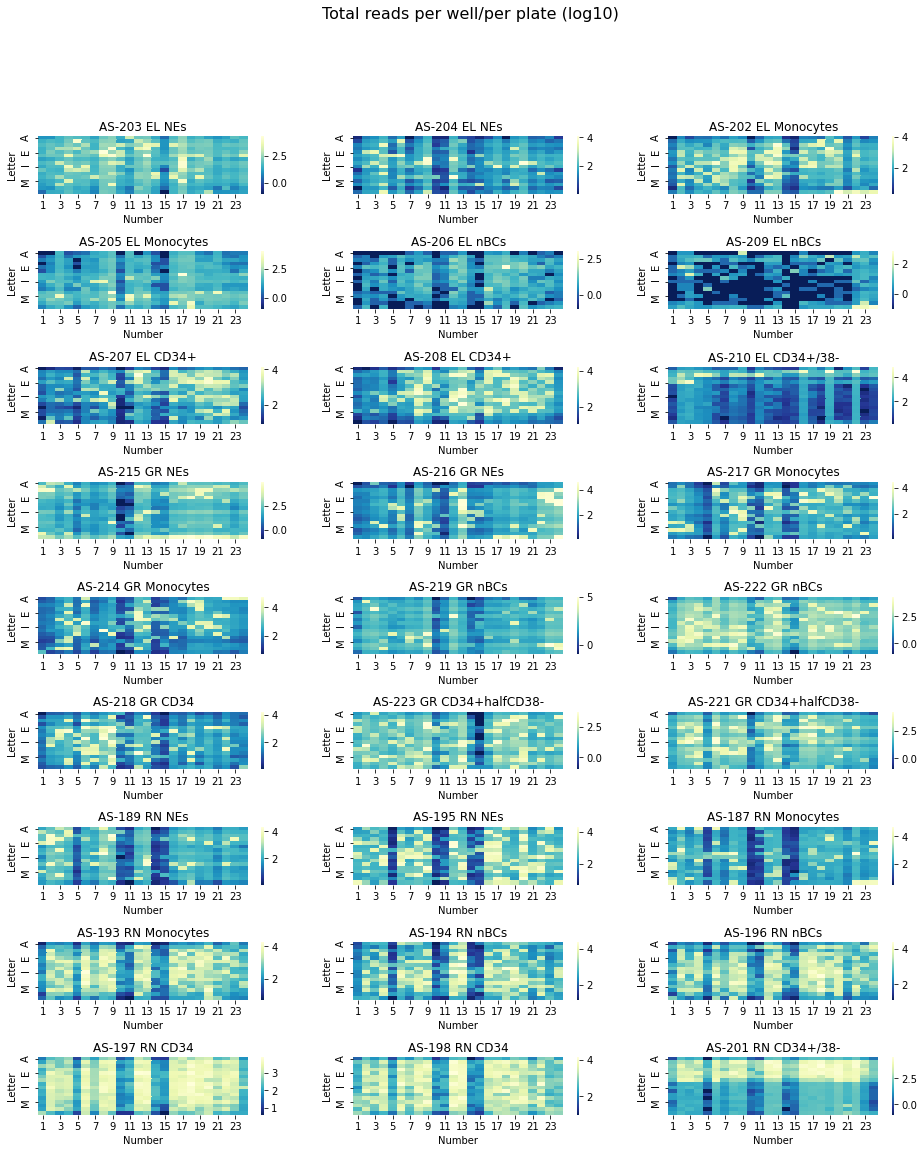

In [10]:
#This cell returns total read counts per well per plate
#This cell grabs counts per well from all 27 plates and plots them into a single large figure. 
#Note the loop through plates rather than miniplates

fig, axs = plt.subplots(9,3, figsize = (16, 18))
fig.subplots_adjust(hspace = 1, wspace=.2)
axs = axs.ravel()


well_counts = {}
count = -1

for plate in plates: #iterate by plate
    rows = []
    count = count + 1
    i = allele_counts.loc[allele_counts['Plate'].isin([plate])] #make a df just contining plate information
    j = plate_pt_dict.get(plate) #use the dict to make a variable that contains the patient name for the current plate
    m = plate_cell_dict.get(plate) #use the dict to make a variable that contains the cell ype for the current plate
    for well in wells:
        total = i[well].astype(int).sum() #sum the read counts per well
        rows.append([plate, j, m, well, total]) #print the counts for each plate/well 
    
    well_counts[plate] = pd.DataFrame(rows, columns = ['Plate', 'Patient', 'Cell_type', 'Well', 'Count'] )
    well_counts[plate].to_csv('../Results/Well_counts/well_counts_'+plate+'.tsv', index = None, sep = '\t')    #Output to file
    
    #most code from here  reshapes the dataframe 
    well_counts[plate] = well_counts[plate].drop(columns = ['Plate', 'Patient', 'Cell_type'])
    well_counts[plate]['Number'] = well_counts[plate]['Well'].str.replace('([A-Z]+)', '')
    well_counts[plate]['Letter'] = well_counts[plate]['Well'].str.extract('([A-Z]+)')
    well_counts[plate] = well_counts[plate].drop(columns = ['Well'])
    well_counts[plate] = well_counts[plate].pivot(index = 'Letter', columns = 'Number', values = 'Count')
    well_counts[plate].columns = well_counts[plate].columns.to_flat_index()
    well_counts[plate] = well_counts[plate].T
    well_counts[plate] = well_counts[plate].reset_index()
    well_counts[plate]['Number'] = well_counts[plate]['Number'].astype(int)
    well_counts[plate] = well_counts[plate].sort_values(by=['Number'])
    well_counts[plate] = well_counts[plate].set_index('Number')
    well_counts[plate] = well_counts[plate].T
    
    #reduce influence of wells with small read counts - as per Fabio's advice "use a log colormap 
    #(here's where pseudocounts are useful, not in the allele frequencies): df = np.log10(0.1 + df). 
    #Why 0.1? It has to look distinct from 1 but too much difference compresses the rest of the colormap too much."
    
    well_counts[plate] = np.log10(0.1 + well_counts[plate])
    
    axs[count] = sns.heatmap(well_counts[plate], cmap = 'YlGnBu_r', ax = axs[count]) #Plot the data on the next ax
    axs[count].set_title(str(plate+' '+j+' '+m)) #set title to contain plate and cell type

fig.suptitle('Total reads per well/per plate (log10)', fontsize=16)
fig.savefig('../Results/Well_counts/well_counts_total_log.png',dpi=600)  

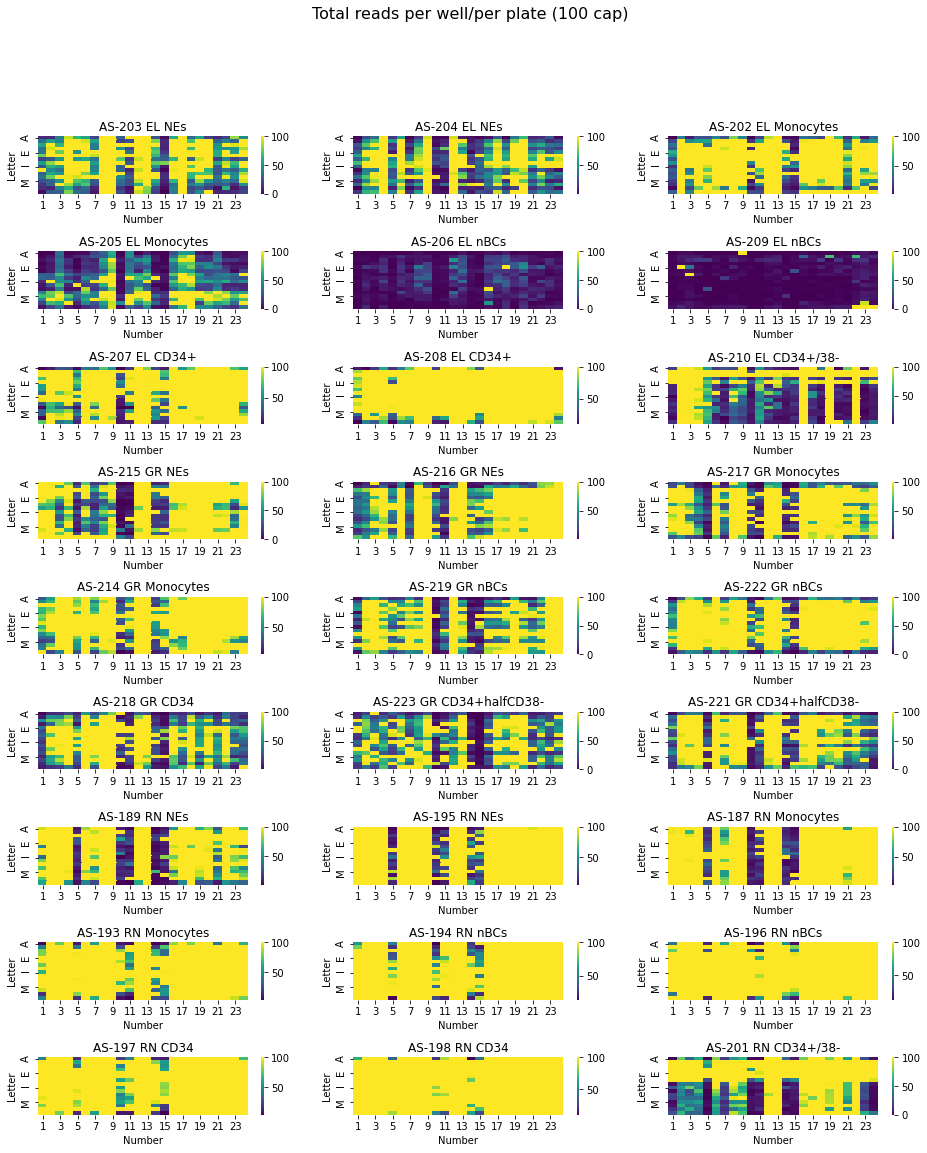

In [14]:
#This cell returns total read counts per well per plate
#This cell grabs counts per well from all 27 plates and plots them into a single large figure. 
#Note the loop through plates rather than miniplates

fig, axs = plt.subplots(9,3, figsize = (16, 18))
fig.subplots_adjust(hspace = 1, wspace=.2)
axs = axs.ravel()


well_counts = {}
count = -1

for plate in plates: #iterate by plate
    rows = []
    count = count + 1
    i = allele_counts.loc[allele_counts['Plate'].isin([plate])] #make a df just contining plate information
    j = plate_pt_dict.get(plate) #use the dict to make a variable that contains the patient name for the current plate
    m = plate_cell_dict.get(plate) #use the dict to make a variable that contains the cell ype for the current plate
    for well in wells:
        total = i[well].astype(int).sum() #sum the read counts per well
        rows.append([plate, j, m, well, total]) #print the counts for each plate/well 
    
    well_counts[plate] = pd.DataFrame(rows, columns = ['Plate', 'Patient', 'Cell_type', 'Well', 'Count'] )
    well_counts[plate].to_csv('../Results/Well_counts/well_counts_'+plate+'.tsv', index = None, sep = '\t')    #Output to file
    
    #most code from here  reshapes the dataframe 
    well_counts[plate] = well_counts[plate].drop(columns = ['Plate', 'Patient', 'Cell_type'])
    well_counts[plate]['Number'] = well_counts[plate]['Well'].str.replace('([A-Z]+)', '')
    well_counts[plate]['Letter'] = well_counts[plate]['Well'].str.extract('([A-Z]+)')
    well_counts[plate] = well_counts[plate].drop(columns = ['Well'])
    well_counts[plate] = well_counts[plate].pivot(index = 'Letter', columns = 'Number', values = 'Count')
    well_counts[plate].columns = well_counts[plate].columns.to_flat_index()
    well_counts[plate] = well_counts[plate].T
    well_counts[plate] = well_counts[plate].reset_index()
    well_counts[plate]['Number'] = well_counts[plate]['Number'].astype(int)
    well_counts[plate] = well_counts[plate].sort_values(by=['Number'])
    well_counts[plate] = well_counts[plate].set_index('Number')
    well_counts[plate] = well_counts[plate].T
    
    #reduce influence of wells with small read counts - as per Fabio's alternate advice "cap the color at 100 reads: df = np.minimum(df, 100)"
    
    well_counts[plate] = np.minimum(well_counts[plate], 100)
    
    axs[count] = sns.heatmap(well_counts[plate], cmap = 'viridis', ax = axs[count]) #Plot the data on the next ax
    axs[count].set_title(str(plate+' '+j+' '+m)) #set title to contain plate and cell type

fig.suptitle('Total reads per well/per plate (100 cap)', fontsize=16)
fig.savefig('../Results/Well_counts/well_counts_total_100cap.png',dpi=600) 